# Практическая работа №1

### Используемые библиотеки

In [149]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import eigvals
from matplotlib import pyplot as plt

### Глобальные переменные

### Исходные данные
`data1.csv`:
```csv
a1,a2
4,2.9
2.5,1
3.5,4
2,2.1
```
`data2.csv`:
```csv
a1,a2
8,-20
0,-1
10,-19
10,-20
2,0
```

## Задание 1

In [150]:
frame = pd.read_csv('data1.csv')
print(f"Исходный набор данных:")
frame

Исходный набор данных:


,a1,a2
0,4.0,2.9
1,2.5,1.0
2,3.5,4.0
3,2.0,2.1


In [151]:
def k(x1, x2):
    return (x1["a1"] - x2["a1"])**2 + (x1["a2"] - x2["a2"])**2

pd.DataFrame([[k(frame.loc[i], frame.loc[j]) for j in range(0, 4)] for i in range(0, 4)])

,0,1,2,3
0,0.00,5.86,1.46,4.64
1,5.86,0.00,10.00,1.46
2,1.46,10.00,0.00,5.86
3,4.64,1.46,5.86,0.00


## Задание 2

In [152]:
frame = pd.read_csv('data2.csv')
print(f"Исходный набор данных:")
frame

Исходный набор данных:


,a1,a2
0,8,-20
1,0,-1
2,10,-19
3,10,-20
4,2,0


In [153]:
pd.DataFrame(frame.mean())

,0
a1,6.0
a2,-12.0


In [154]:
covariant = frame.cov()
covariant

,a1,a2
a1,22.0,-47.5
a2,-47.5,110.5


In [155]:
eig = eigvals(covariant.values)
pd.DataFrame(eig)

,0
0,1.332264
1,131.167736


In [156]:
frame.corr()

,a1,a2
a1,1.000000,-0.963388
a2,-0.963388,1.000000


## Задание 3

In [160]:
pca = PCA(n_components=2)
pca.fit_transform(frame)
pd.DataFrame(pca.components_, columns=frame.columns)

,a1,a2
0,-0.398979,0.916960
1,-0.916960,-0.398979


In [158]:
for i, val in enumerate(eig):
    print(f"Остаточная дисперсия компоненты {i}: {val / sum(eig)}")

Остаточная дисперсия компоненты 0: 0.010054819581944766
Остаточная дисперсия компоненты 1: 0.9899451804180553


(-0.5, 10.5, -21.0, 1.0)

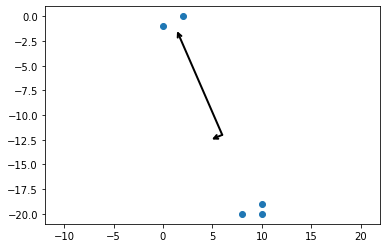

In [159]:
plt.scatter(frame["a1"], frame["a2"])
ax = plt.gca()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    props=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=props)
plt.axis('equal')

#### Медиана
##### Медиана - это число, которое находится в середине набора, если его упорядочить по возрастанию.
##### Формула:
\begin{equation}
    med(x) =
    \begin{cases}
        X_{\frac{n}{2}} & \text{если $n$ чётное} \\
        \frac{X_{\frac{n-1}{2}} - X_{\frac{n+1}{2}}}{2} & \text{если $n$ нечётное}
    \end{cases}
\end{equation}
,где $X$ - отсортированный набор значений, $n$ - количество значений в наборе.
